<a href="https://colab.research.google.com/github/Elwing-Chou/kmu1203/blob/main/2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/kmu1203/raw/main/danmu.txt"
req.urlretrieve(url, "danmu.txt")

('danmu.txt', <http.client.HTTPMessage at 0x7b6c5aa833a0>)

In [23]:
# 型態: DataFrame(2D表格)  Series(1D 一列/一行)
import pandas as pd
df = pd.read_json("danmu.txt", encoding="utf-8")
df

,text,color,size,position,time,sn,userid
0,祝☆TV動畫化,#B538FA,2,1,0,23255401,kumosorayk
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


from matplotlib import pyplot as plt
df['size'].plot(kind='hist', bins=20, title='size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['position'].plot(kind='hist', bins=20, title='position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['time'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sn'].plot(kind='hist', bins=20, title='sn')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='size', y='position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='position', y='time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='time', y='sn', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['position']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('position')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['sn']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('sn')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['size'].plot(kind='line', figsize=(8, 4), title='size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['position'].plot(kind='line', figsize=(8, 4), title='position')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['time'].plot(kind='line', figsize=(8, 4), title='time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sn'].plot(kind='line', figsize=(8, 4), title='sn')
plt.gca().spines[['top', 'right']].set_visible(False)

Pandas必會操作

1. 篩選
2. 轉換

In [24]:
# demo篩選:
# 1. 準備跟你資料筆數依樣多的True/False 2. df[True/False]
test = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])
fil = [True, False, False]
test[fil]

,0,1
0,1,2


In [25]:
# 你做的任何操作都是廣播操作
fil = df["time"] > 10000
df[fil]

,text,color,size,position,time,sn,userid
512,彈幕壞了,#FFFFFF,1,0,10103,24949074,Darren945
513,1＋1=8,#FF0026,2,1,10122,23746625,BHSN00002sgq
514,聳包,#FFFFFF,1,0,10148,28024168,aa001199
515,掉下來其實滿噁心的,#FF0026,1,2,10162,23366558,a24236809
516,而且還會講話,#FF0026,1,2,10185,28160924,lx0220
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


In [26]:
# 組合方式: 而且(&) 或者(|)
fil = (df["time"] < 10000) | (df["time"] > 70000)
df[fil]

,text,color,size,position,time,sn,userid
0,祝☆TV動畫化,#B538FA,2,1,0,23255401,kumosorayk
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


In [31]:
# Everything is an object
# 每個東西都具有型態, 每種型態都有它特定的操作
# 型態: 字串 操作: * 2
# 型態: 清單 操作: [0] [1] [2]
# 型態: int 操作: (4.6)
def add(n1, n2):
    new = n1 + n2
    return new
b = add
b(3, 5)

8

In [ ]:
# 轉換操作: Series.apply(錦囊)
def func(n):
    return -n + 1

df["time"].apply(func)

In [ ]:
# 過濾+轉換
def func(s):
    return "神作" in s
# 轉換
fil = df["text"].apply(func)
# 過濾
df[fil]

資料視覺化
1. matplotlib: 畫圖基礎函式庫
2. seaborn: 進階

countplot(x軸類別< y軸數目)
histplot(x軸連續, y軸數目)
scatterplot(x, y軸皆連續)

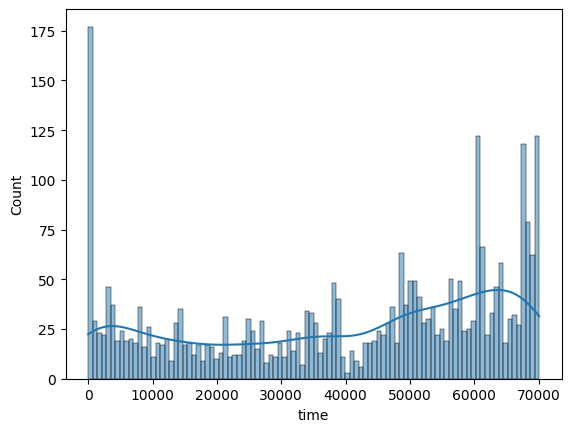

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x=df["time"], bins=100, kde=True)
# plt.savefig("danmu.png")

In [50]:
import urllib.request as req
url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
req.urlretrieve(url, "dict.big")

('dict.big', <http.client.HTTPMessage at 0x7b6c4f38f430>)

In [51]:
import jieba
jieba.set_dictionary("dict.big")

In [64]:
import jieba.analyse
def func(s):
    return " ".join(jieba.cut(s))
c = df["text"].apply(func)
textjoin = "\n".join(c)
keywords = jieba.analyse.extract_tags(textjoin, topK=30, withWeight=True)
tfidf = pd.DataFrame(keywords, columns=["word", "tfidf"])
tfidf

,word,tfidf
0,大哥,0.342462
1,沒有,0.290703
2,2021,0.150040
3,2022,0.132848
4,10,0.079709
5,QQ,0.070331
6,巴哈,0.061191
7,什麼,0.060954
8,11,0.059391
9,12,0.057828
